## **DSL 24-1 기초 과제 1**

### 기수 : 12
### 이름 : 조정흠

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


필수 라이버러리 갖고오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [22]:
path_to_image = "./data//image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

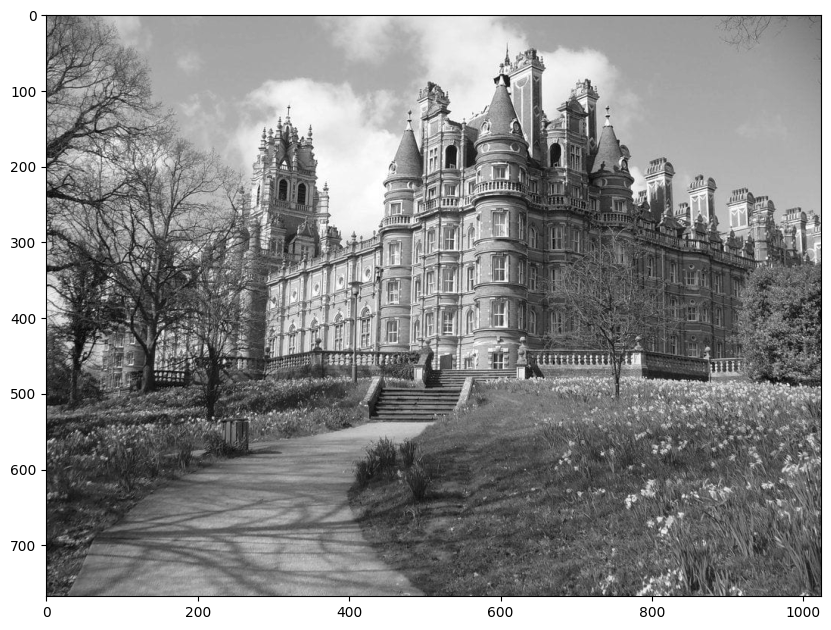

In [23]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [24]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [25]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


In [26]:
Sigma

array([1.14412844e+05, 1.51174600e+04, 1.33454180e+04, 1.07000938e+04,
       7.75764160e+03, 6.86091357e+03, 6.67207227e+03, 5.49835059e+03,
       5.31170605e+03, 5.07449805e+03, 4.77879346e+03, 4.52459424e+03,
       4.38099805e+03, 4.22789893e+03, 3.96544824e+03, 3.88810107e+03,
       3.84263525e+03, 3.76578271e+03, 3.35547510e+03, 3.29883154e+03,
       3.20950073e+03, 3.12345044e+03, 3.09025024e+03, 3.06755396e+03,
       2.94689062e+03, 2.84382202e+03, 2.83098730e+03, 2.73389551e+03,
       2.66998828e+03, 2.57969775e+03, 2.56339624e+03, 2.51491650e+03,
       2.46856689e+03, 2.43761938e+03, 2.42592944e+03, 2.34623218e+03,
       2.31058496e+03, 2.28057690e+03, 2.26477686e+03, 2.21395361e+03,
       2.20540698e+03, 2.13749951e+03, 2.09690820e+03, 2.05399121e+03,
       2.04693481e+03, 2.02692407e+03, 2.01032153e+03, 1.98890979e+03,
       1.98526660e+03, 1.96169006e+03, 1.93681848e+03, 1.91630688e+03,
       1.90104968e+03, 1.89739514e+03, 1.84811206e+03, 1.84307861e+03,
      

 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

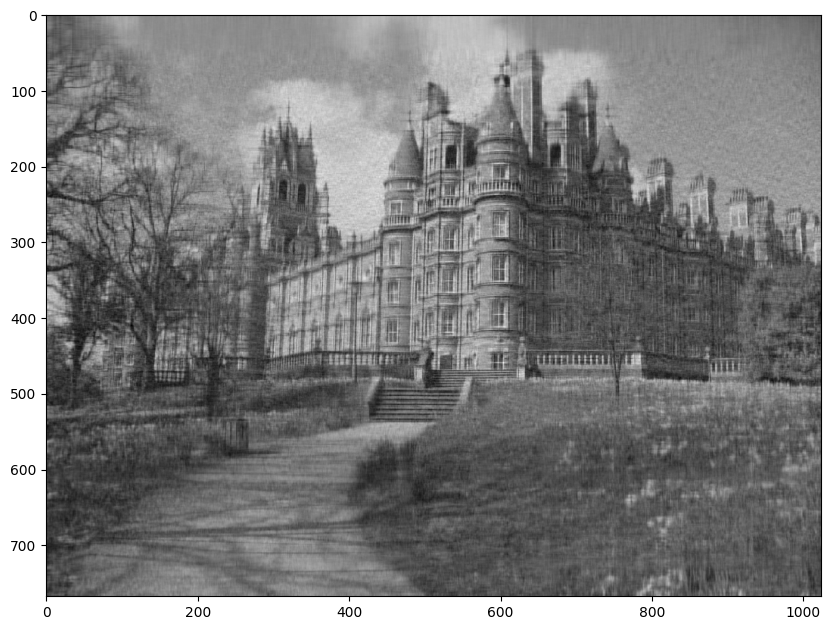

In [27]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [28]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 5.70441 seconds
Processing Time for 10 Compressed Images: 0.33115 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다. 
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [2]:
path_to_image = "./data/custom_image.jpg"

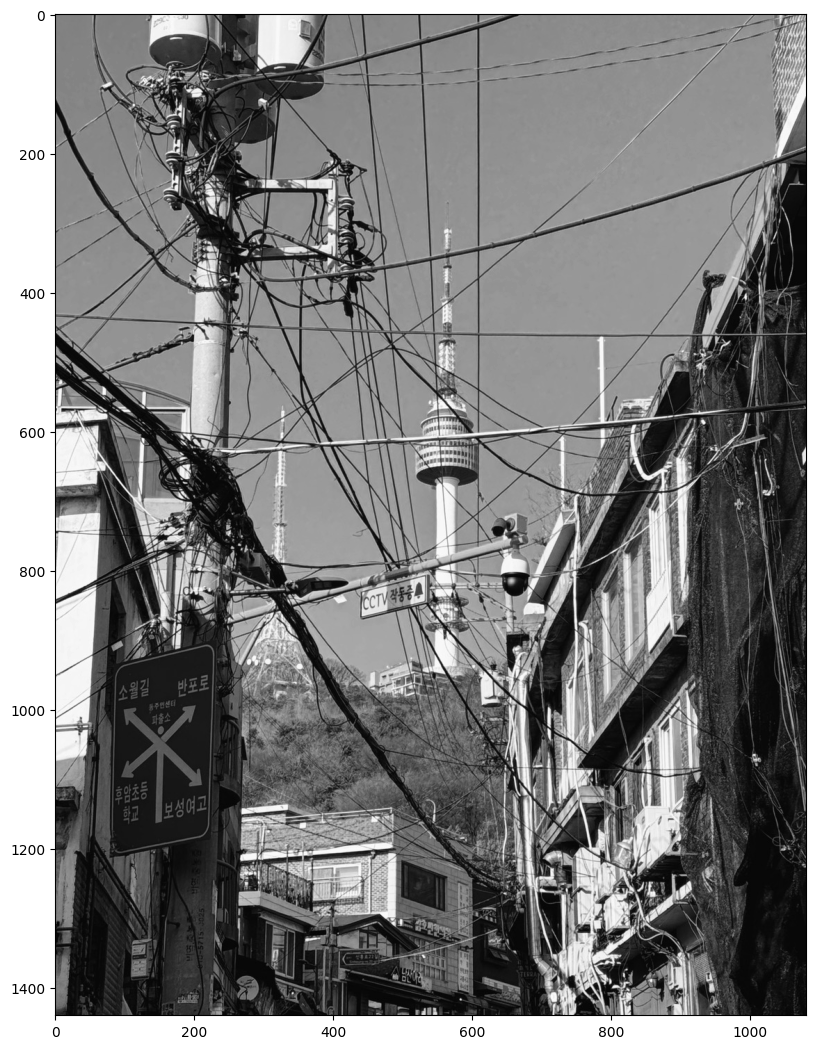

In [3]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [29]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (768, 1024)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [19]:
num_elements = 60

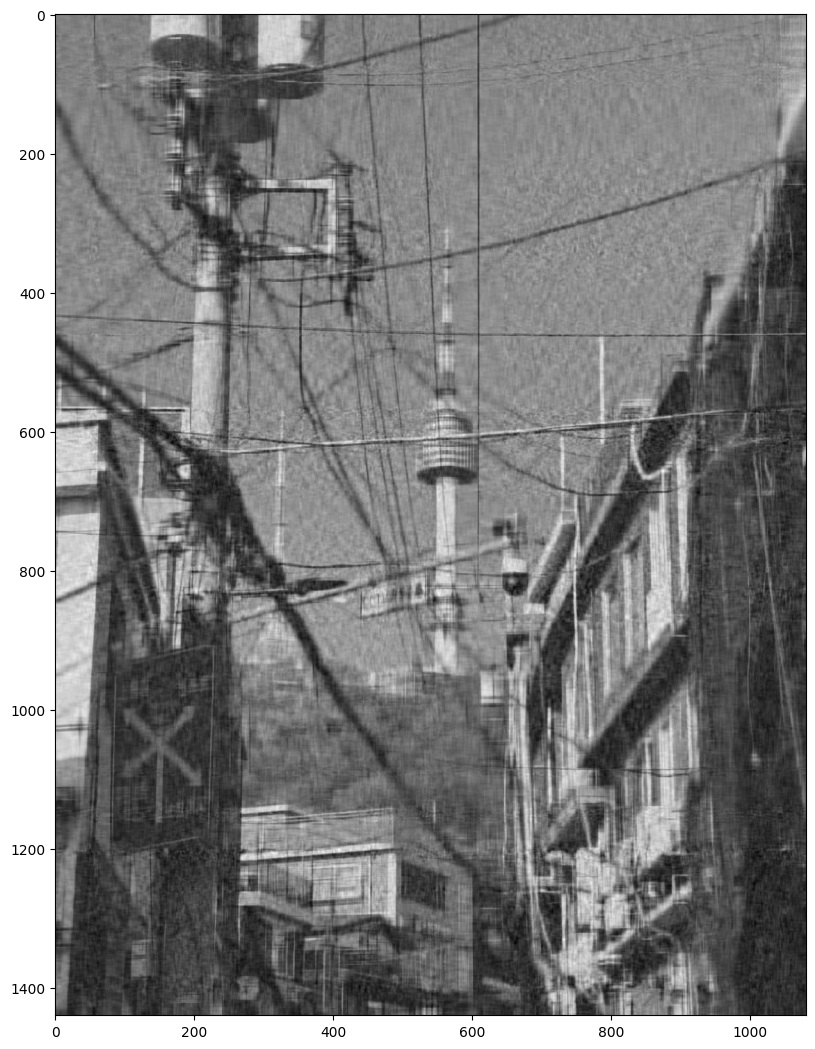

In [20]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [30]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 5.63184 seconds
Processing Time for 10 Compressed Images: 0.32904 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [80]:
path_to_csv = "./data/heights.csv"

전처리

In [81]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [82]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [83]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [84]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [93]:
F , p_value = stats.f_oneway(DSL.heights, ESC.heights, Else.heights)


print(f"F: {F}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("각 학회의 평균 키에 차이가 있다.")
else:
    print("각 학회의 평균 키에 차이가 없다.")

F: 6.82185346949053
P-value: 0.001305966460233181
각 학회의 평균 키에 차이가 있다.


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [96]:
import pandas as pd

path_to_csv = "./data/train.csv"
data = pd.read_csv(path_to_csv)

In [97]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [11]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가

In [98]:
filteredName = []

for i in data.Name.to_list():
    filteredName.append(i[0:i.find(',')])

data['filteredName'] = filteredName

data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked filteredName  
0      0         A/5 21171   7.2500   NaN        S       Braund  
1      0          PC 17599  71.2833   C85        C      Cumings  
2      0  STON/O2. 3101282   7.9250   NaN        S    Heikkinen  
3      0            113803  53.1000  C123        S     Futrelle  
4      0            373450   8.0500   NaN        S        Allen

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [ ]:
# TO-DO

# 정렬

In [99]:
data.sort_values(by=['Age'], inplace=True)
data.head()

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked filteredName  
803  0.42      0      1    2625   8.5167   NaN        C       Thomas  
755  0.67      1      1  250649  14.5000   NaN        S   Hamalainen  
644  0.75      2      1    2666  19.2583   NaN        C      Baclini  
469  0.75      2      1    2666  19.2583   NaN        C      Baclini  
78   0.83      0      2  248738  29.0000   NaN        S     Caldwell

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

In [14]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
# 2. 히스토그램 시각화

In [100]:
temp = dict()

temp[data.Cabin[0]]=1
for i in data.Cabin[1:]:
    if i in temp.keys():
        temp[i] += 1
    else:
        temp[i] = 1
keys = list(temp.keys())
keys[0] = "NaN"

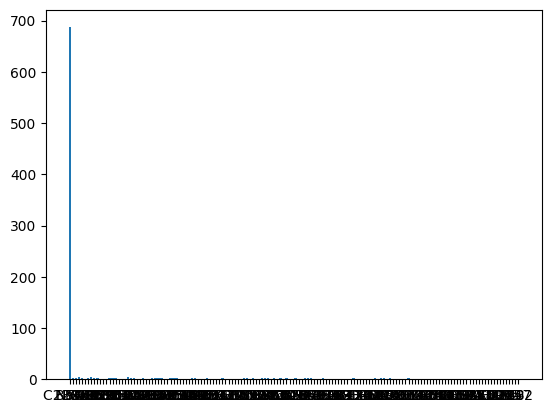

In [101]:
plt.bar(keys, temp.values())
plt.show()

6-4. (Optional) 

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

In [115]:
correlation_coefficient_SibSp, p_value_SibSp = stats.pearsonr(data.SibSp, data.Survived)
print(correlation_coefficient_SibSp, p_value_SibSp)

correlation_coefficient_Parch, p_value_Parch = stats.pearsonr(data.Parch, data.Survived)
print(correlation_coefficient_Parch, p_value_Parch)

-0.035322498885735604 0.29224392869829086
0.08162940708348347 0.014799245374727947


Parch 변수와 Survived 변수와의 상관관계가 더 크고 P-value가 더 작기 때문에 Parch 변수를 선택할 것이다.

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [39]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO
arr1 = arr[:2,:2]
arr2 = arr[1:3,:2]
arr3 = arr[:2,1:3]
arr4 = arr[1:3,1:3]

tensor = [arr1, arr2, arr3, arr4]
tensor

[array([[1, 2],
        [4, 5]]),
 array([[4, 5],
        [7, 8]]),
 array([[2, 3],
        [5, 6]]),
 array([[5, 6],
        [8, 9]])]

6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

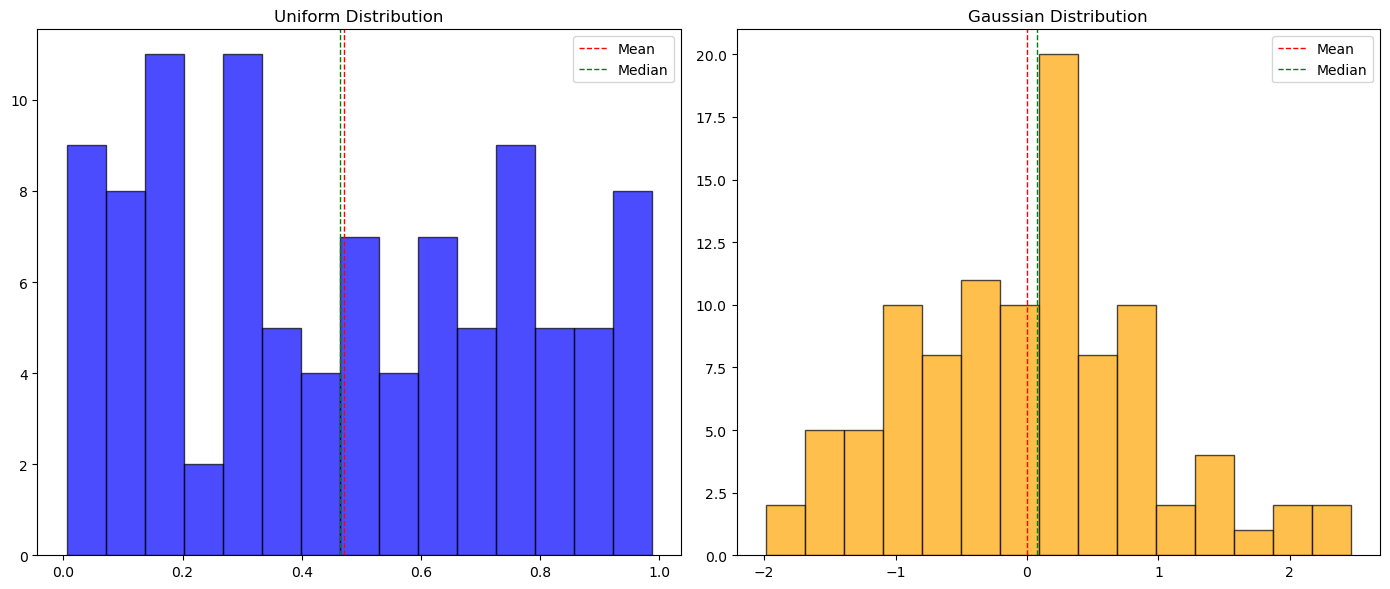

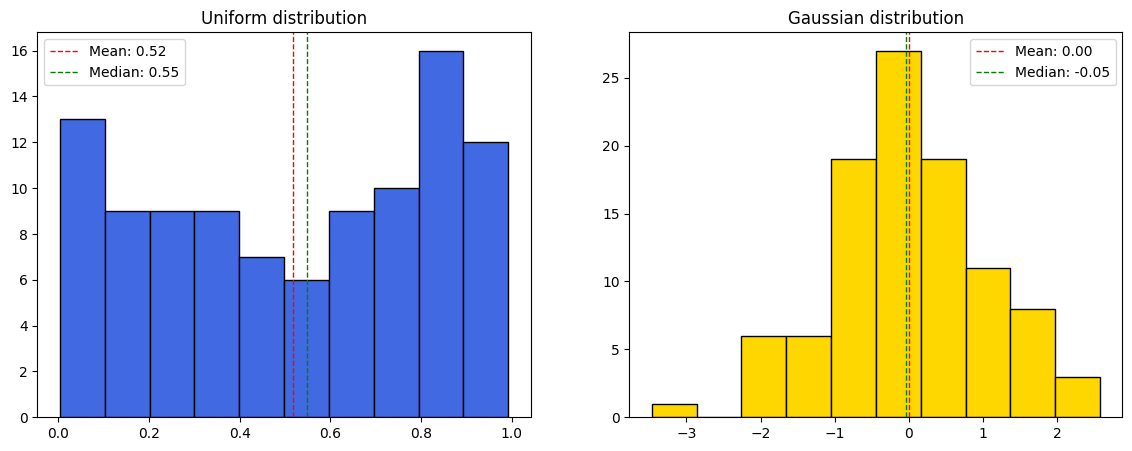

In [79]:
# TO-DO

# 1. Uniform Distribution으로부터 100개의 점 Sampling
samples_uniform = np.random.uniform(low=0.0, high=1.0, size=100)
# 2. Gaussian Distribution으로부터 100개의 점 Sampling
samples_gaussian = np.random.normal(loc=0, scale=1, size=100)
# 3. 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].hist(samples_uniform, color='royalblue', edgecolor='black')
axs[0].set_title('Uniform distribution')
axs[1].hist(samples_gaussian, color='gold', edgecolor='black')
axs[1].set_title('Gaussian distribution')
# 4. 평균/중앙값 점선으로 시각화
uniform_mean = np.mean(samples_uniform)
uniform_median = np.median(samples_uniform)
gaussian_mean = np.mean(samples_gaussian)
gaussian_median = np.median(samples_gaussian)

axs[0].axvline(uniform_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {uniform_mean:.2f}')
axs[0].axvline(uniform_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {uniform_median:.2f}')
axs[0].legend()

axs[1].axvline(gaussian_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {gaussian_mean:.2f}')
axs[1].axvline(gaussian_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {gaussian_median:.2f}')
axs[1].legend()

plt.show()
